In [34]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [35]:
#Defining the 2 distributions
# Create a 2D array with 100 rows and 2 columns
np.random.seed(15)
data1 = np.random.normal(loc=(1, -1), scale=1, size=(20, 2))
#add the augment column as the first column to the data
augment = np.ones((20, 1))
augment_1 = np.hstack((augment, data1))
# Create a 2D array with 100 rows and 2 columns
data2 = np.random.normal(loc=(1, 1), scale=1, size=(20, 2))
#add the augment column as the first column to the data
augment = np.ones((20, 1))
augment_2 = np.hstack((augment, data2))
print("Dataset 1:\n", data1)
print("\nDataset 2:\n", data2)


Dataset 1:
 [[ 0.68767152 -0.66071529]
 [ 0.84409147 -1.50178967]
 [ 1.23556889 -2.76360526]
 [-0.09586204 -2.08776574]
 [ 0.69482995 -1.47374837]
 [ 0.79940546 -0.64480323]
 [ 1.68951772 -0.58941032]
 [ 0.43502156 -0.40060931]
 [ 0.83706369  0.6002145 ]
 [ 1.6816272  -0.9851199 ]
 [ 0.91222037 -1.98211784]
 [ 1.12169048 -2.13743729]
 [ 1.34900258 -2.85851316]
 [-0.16718189  0.42489683]
 [ 2.49656536  0.28993206]
 [-0.81174527 -2.49830721]
 [-0.45014322 -2.69390696]
 [ 1.22726403 -1.48973471]
 [ 0.99947149 -1.49025262]
 [ 0.20679058  1.04889876]]

Dataset 2:
 [[ 1.60318544e+00  1.79792200e-03]
 [ 2.21504155e+00  3.32483509e-01]
 [ 7.27494223e-01  2.41677448e+00]
 [ 2.17391042e-01  7.49679303e-01]
 [ 6.91685539e-01  2.72968803e+00]
 [ 2.97827237e+00  1.21968803e+00]
 [ 2.89481985e+00 -3.68099437e-01]
 [ 8.08694614e-01  2.28725753e+00]
 [ 7.53116056e-01  1.34255108e+00]
 [ 1.22271704e+00  1.68159371e+00]
 [ 1.25144889e+00 -4.81848939e-01]
 [ 6.13178225e-01  2.66319289e-01]
 [ 1.58597821e

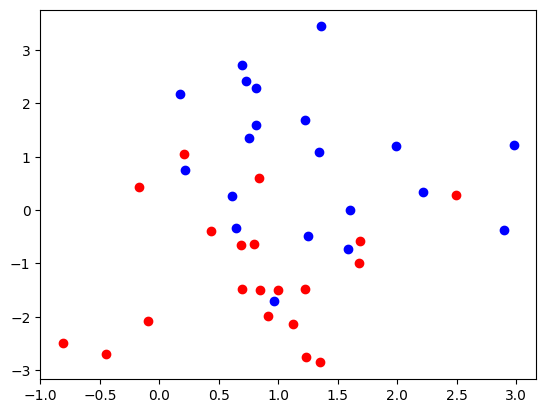

In [36]:
#Plot the 2 distributions
plt.scatter(data1[:, 0], data1[:, 1], color='red')# this will plot the first column of data1 on the x-axis and the second column on the y-axis
plt.scatter(data2[:, 0], data2[:, 1], color='blue')# this will plot the first column of data2 on the x-axis and the second column on the y-axis
plt.show()


In [37]:
theta0 = np.random.uniform(-0.5, 0.5)
theta1 = np.random.uniform(-0.5, 0.5)
theta2 = np.random.uniform(-0.5, 0.5)
theta_weights = np.array([theta0, theta1, theta2])
print(f"The inital random weights are : {theta_weights}")
print(f"The shape of the weights is : {theta_weights.shape}")

The inital random weights are : [0.12162033 0.43626246 0.09903967]
The shape of the weights is : (3,)


In [38]:
#function used to plot the decision boundary
def decision_boundary(theta_weights, data1, data2):
    x = np.linspace(-2.5, 2.5, 2)
    y = (-theta_weights[0] - theta_weights[1]*x) / theta_weights[2]
    plt.plot(x, y, color='black')
    plt.scatter(data1[:, 0], data1[:, 1], color='red')
    plt.scatter(data2[:, 0], data2[:, 1], color='blue')
    plt.legend(['Decision Boundary', 'Dataset 1', 'Dataset 2'])
    plt.show()

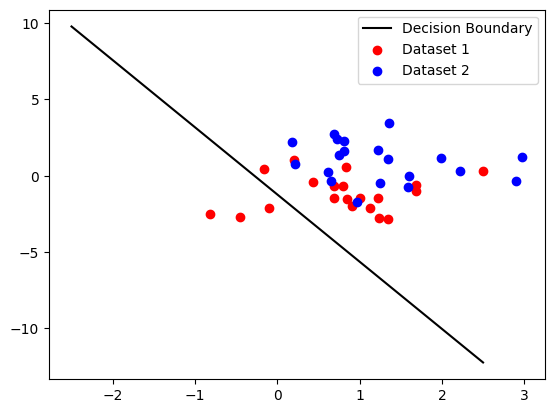

In [39]:
#Plotting the parameters as a line
decision_boundary(theta_weights, data1, data2)


In [40]:
#Definig the sigmoid function to be used in the logistic regression and to find h_theta(x)
def sigmoid (z):
    return 1 / (1 + np.exp(-z))

print(f"phi(0)={sigmoid(0)}")
print(f"phi'(0)={sigmoid(0)}")



phi(0)=0.5
phi'(0)=0.5


In [41]:
#cost function h_theta(x)
def h_theta(theta_weights, x):
    z = np.dot(x, theta_weights)  # Linear combination
    return sigmoid(z)




In [42]:
#Hence the likelihood function is given by
def likelihood (theta_weights,data):
    sum = 0
    for point in data:
        sum += point[1]*math.log(h_theta(theta_weights, point)) + (1-point[1])*math.log(1-h_theta(theta_weights, point))
    return -sum

augment_data = np.vstack((augment_1, augment_2))
print(f"The log likelihood of the model is for the combined dataset is: {likelihood(theta_weights, augment_data)}")

The log likelihood of the model is for the combined dataset is: 6.758079109029375


In [43]:
#Cost function with regularization
def cost_func_regul(theta_weights, data, lamda):
    sum = 0 
    #regularization term sum
    sum_reg = 0
    for i in range(1, len(theta_weights)):
        sum_reg += theta_weights[i]**2

    for point in data:
        sum += point[1]*math.log(h_theta(theta_weights, point)) + (1-point[1])*math.log(1-h_theta(theta_weights, point)) 
    return (-sum)+(lamda*sum_reg)

print(f"The cost function with regularization for the combined dataset is: {cost_func_regul(theta_weights, augment_data, 0.005)}")


The cost function with regularization for the combined dataset is: 6.759079777965665


In [44]:
#doing gradiant descent to find the optimal weights
def gradient_descent_single(theta_weights, data, learning_rate):
    

print(f"The optimal theta0 for dataset 1 is: {gradient_descent_single(theta_weights, augment_1, 0.01)}")


The optimal theta0 for dataset 1 is: (array([  2.08520274,  -0.06826758, -19.86124017]), array([  2.27174871,   0.11851292, -19.67340931]), array([  2.07151346,  -0.08197437, -19.87502297]))
